In [1]:
import pandas as pd
import yfinance as yf
from src.TimeSeries import TimeSeries
from src.TimeSeriesPlot import TimeSeriesPlot
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
# Descargar precios de MELI
meli = yf.download('MELI', start='2022-01-01', end='2025-07-07', period='1d')
dates = meli.index
meli_prices = meli['Close']['MELI']
meli_high = meli['High']['MELI']
meli_low = meli['Low']['MELI']
meli_open = meli['Open']['MELI']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Una serie temporal es ...

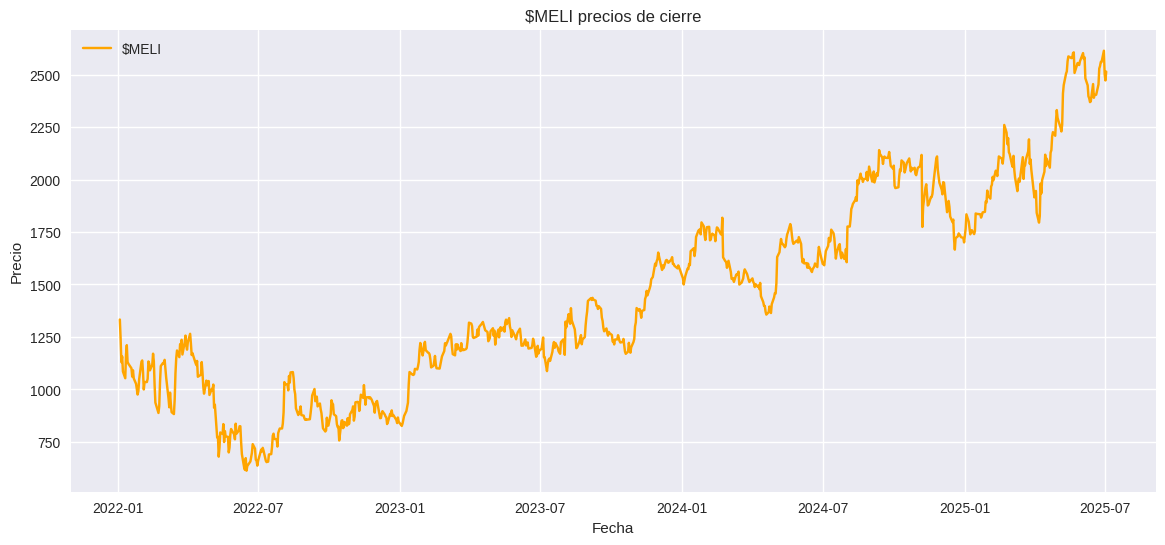

In [3]:
ts = TimeSeries('$MELI', dates, meli_prices, meli_open, meli_high, meli_low)

plot = TimeSeriesPlot(ts)
plot.add_original(color='orange')
plot.add_grid()
plot.set_title('$MELI precios de cierre')
plot.show()

Este gráfico presenta los precios del stock de MercadoLibre a lo largo del tiempo.

## Filtros

Las EMAS son...  (explicar Moving Average y Exp.MA)

Poner formulitas.

Las EMAS se usan como soporte y para visualizar tendencias ...

Cruces de EMAS

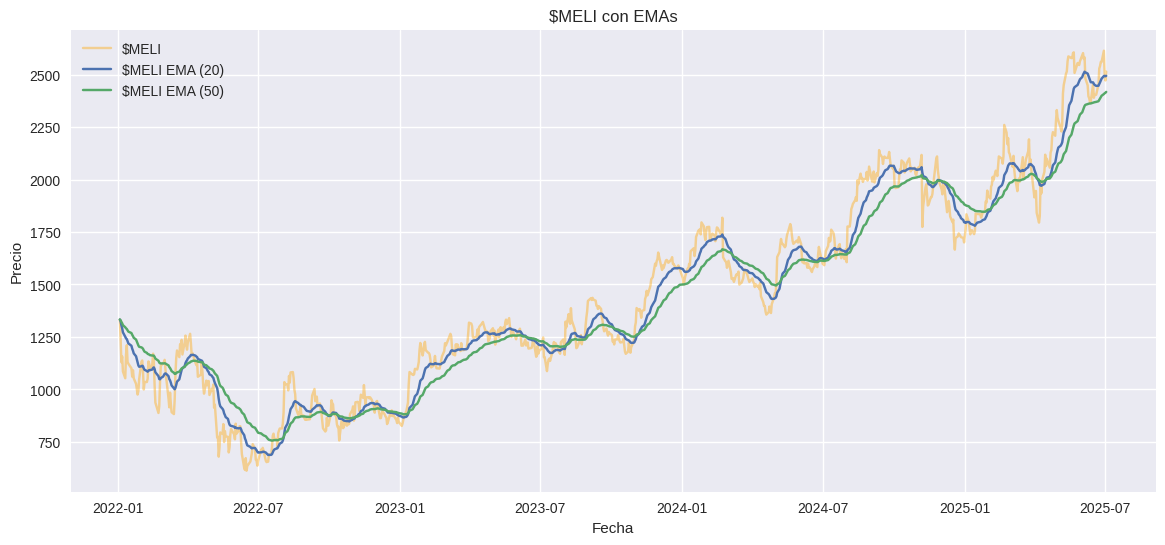

In [4]:
plot = TimeSeriesPlot(ts)
plot.add_original(alpha=0.4, color='orange')
plot.add_ema(20)
plot.add_ema(50)
plot.add_grid()
plot.set_title('$MELI con EMAs')
plot.show()

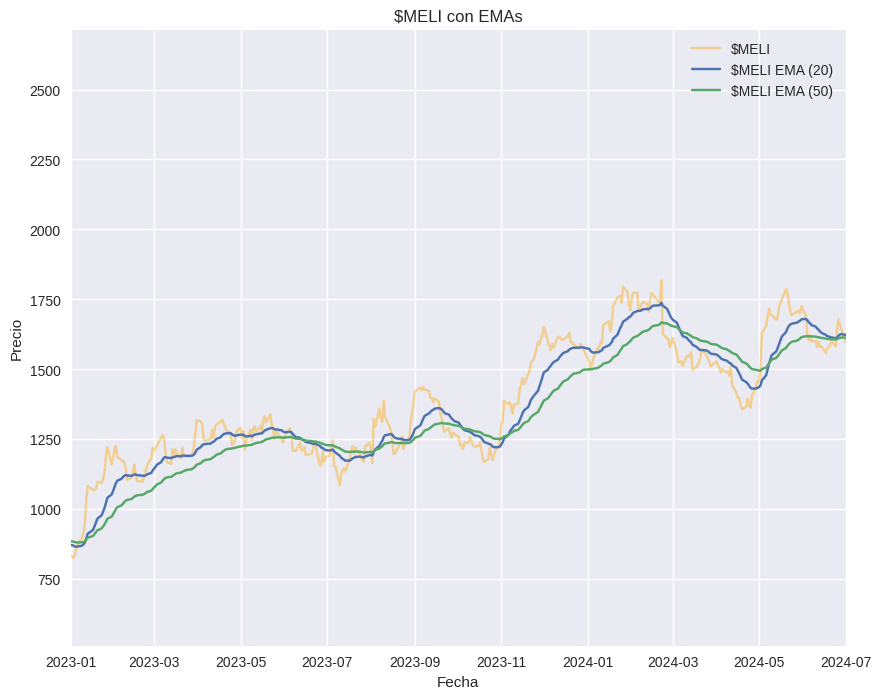

In [5]:
plot = TimeSeriesPlot(ts, (10, 8))
plot.add_original(alpha=0.4, color='orange')
plot.add_ema(20)
plot.add_ema(50)
plot.add_grid()
plot.set_title('$MELI con EMAs')
plot.set_lims(xlim=(pd.to_datetime('2023-01'), pd.to_datetime('2024-07')))
plot.show()

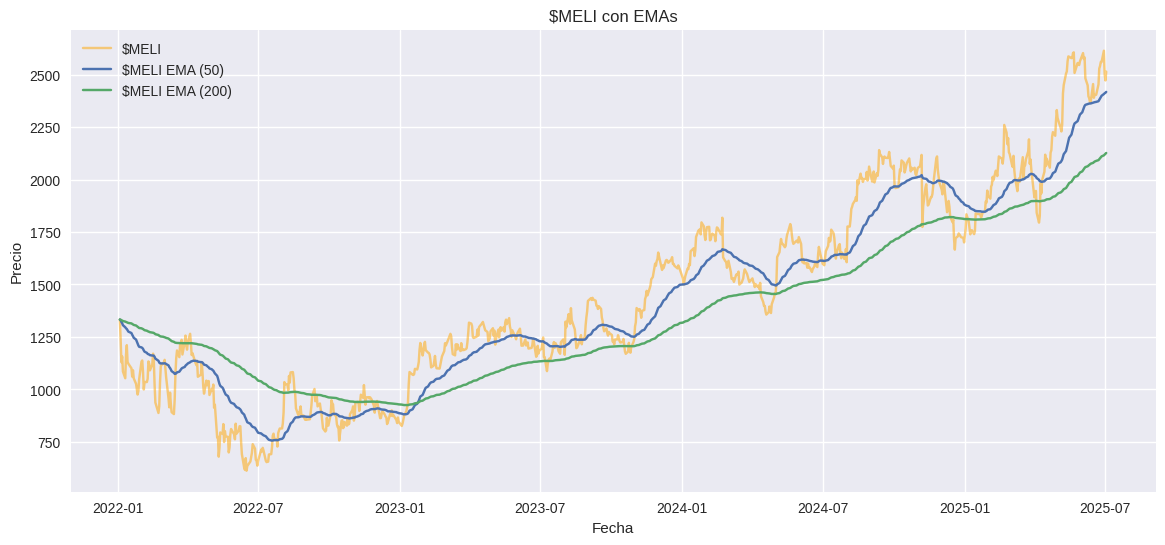

In [6]:
plot = TimeSeriesPlot(ts)
plot.add_original(alpha=0.5, color='orange')
plot.add_ema(50)
plot.add_ema(200)
plot.add_grid()
plot.set_title('$MELI con EMAs')
plot.show()

## Estacionalidad de la serie

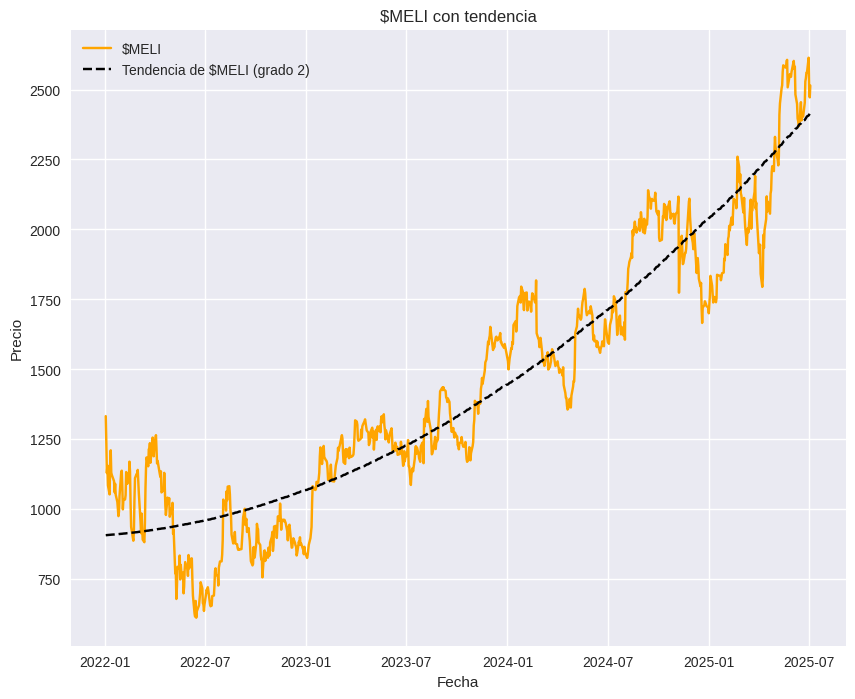

In [7]:
plot = TimeSeriesPlot(ts, (10, 8))
plot.add_original(color='orange')
plot.add_tendency(2, color='black', linestyle='--')
plot.set_title('$MELI con tendencia')
plot.show()

In [8]:
ts.is_stationary()

ADF Statistic: -0.3430540415792323
p-value: 0.9191813754561654

KPSS Statistic: 0.35081631788266
p-value: 0.01

Decisión: No estacionaria


False

In [9]:
ts_detrended = ts.detrend_with_regression_fitting(2)
ts_detrended.is_stationary()

ADF Statistic: -4.419685045264742
p-value: 0.0002739058972047366

KPSS Statistic: 0.1297703041442619
p-value: 0.08005499232544089

Decisión: Estacionaria


True

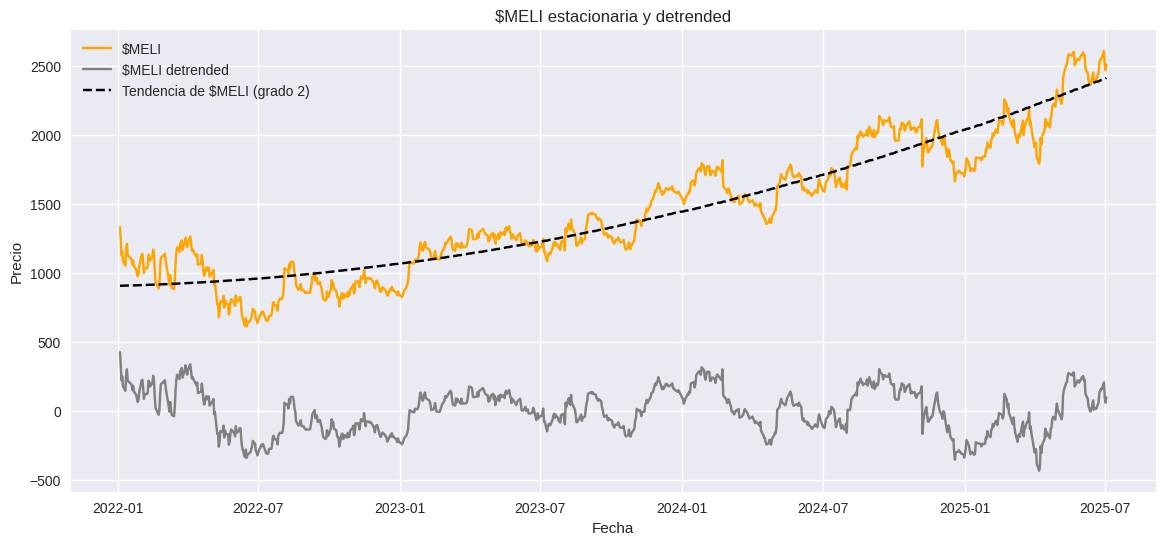

In [10]:
plot = TimeSeriesPlot(ts)
plot.add_original(color='orange')
plot.add_detrended(2, color='grey')
plot.add_tendency(2, color='black', linestyle='--')
plot.set_title('$MELI estacionaria y detrended')
plot.show()

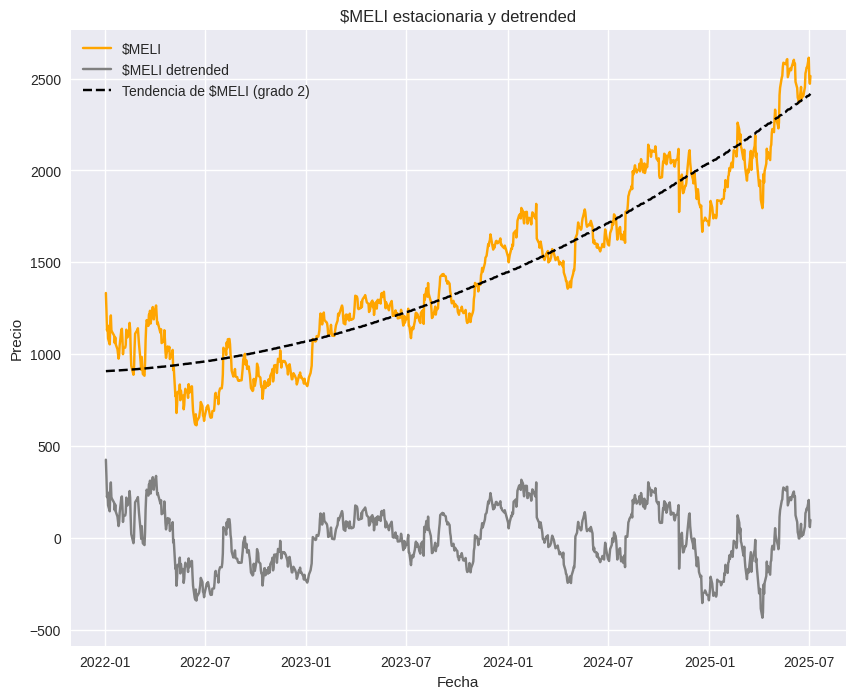

In [11]:
plot = TimeSeriesPlot(ts, (10, 8))
plot.add_original(color='orange')
plot.add_detrended(2, color='grey')
plot.add_tendency(2, color='black', linestyle='--')
plot.set_title('$MELI estacionaria y detrended')
plot.show()

La serie original no es estacionaria. Lo mostramos con el test...

Una forma de hacer estacionaria una serie es quitándole el trend (que en este caso es la principal componente que le agrega no-estacionalidad).

Al hacerla, podemos ver la serie resultante, que cumple el test de estacionalidad. Chusmear utilidades de esto...

Algo que se ve bien en la estacionalidad es la fluctuación entre -500 y 500 en este caso (en otros precios pueden ser mucho mas volatiles, como TSLA)

## Filtros de frecuencia

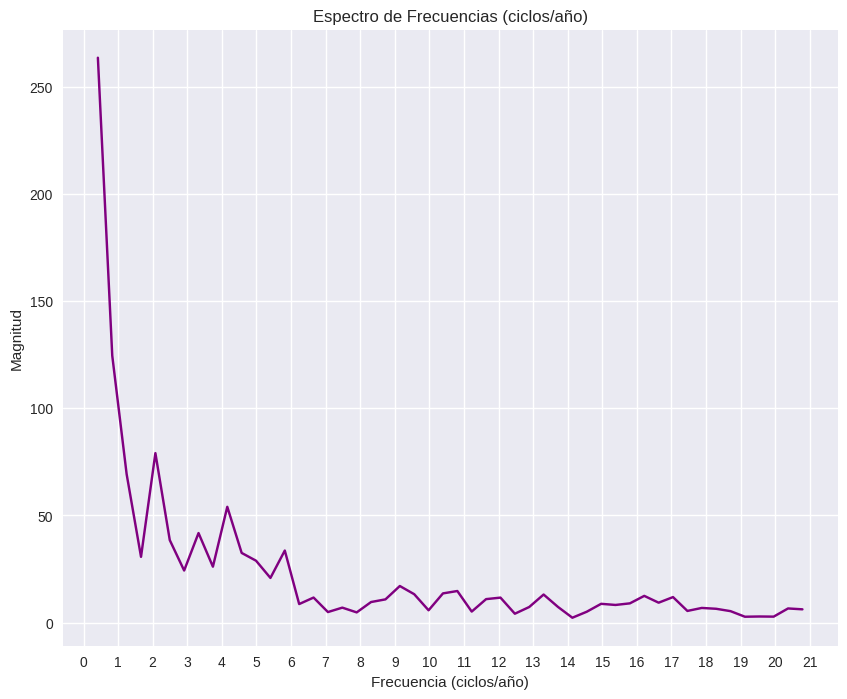

In [12]:
plot = TimeSeriesPlot(ts, (10,8))
plot.add_yearly_frequency_spectrum(50, 1)
plot.show()

Aca esta bueno mostrar la diferencia de espectro de frecuencia entre la serie estacionaria y no estacionaria (muestra el pico en 0 por su trend, conocido en señales como componente DC).

Se puede ver también el ruido (altas frecuencais a partir de 10 aprox)

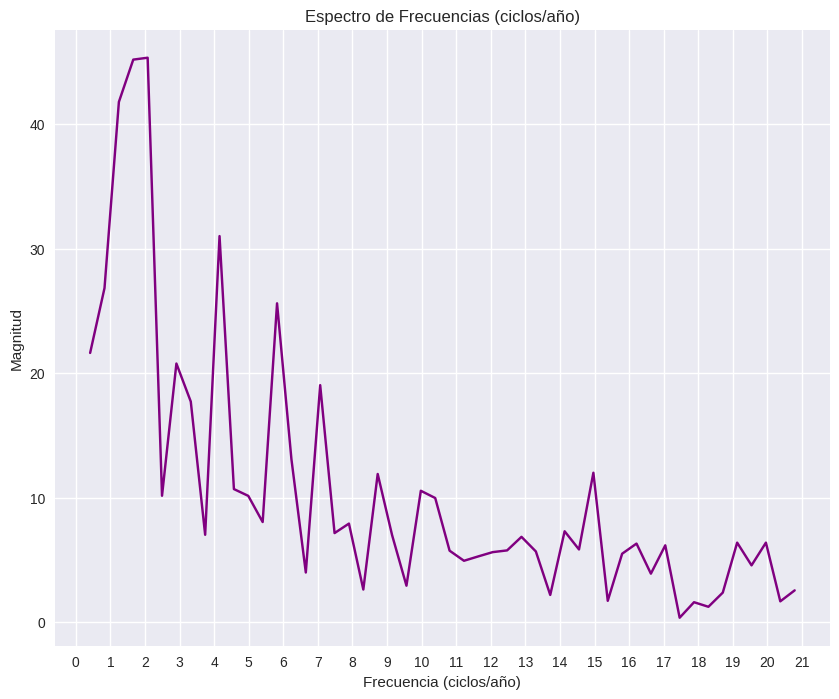

In [13]:
plot = TimeSeriesPlot(ts_detrended, (10,8))
plot.add_yearly_frequency_spectrum(50, 1)
plot.show()

Chusmear posibles aplicaciones de ver frecuencia en finanzas

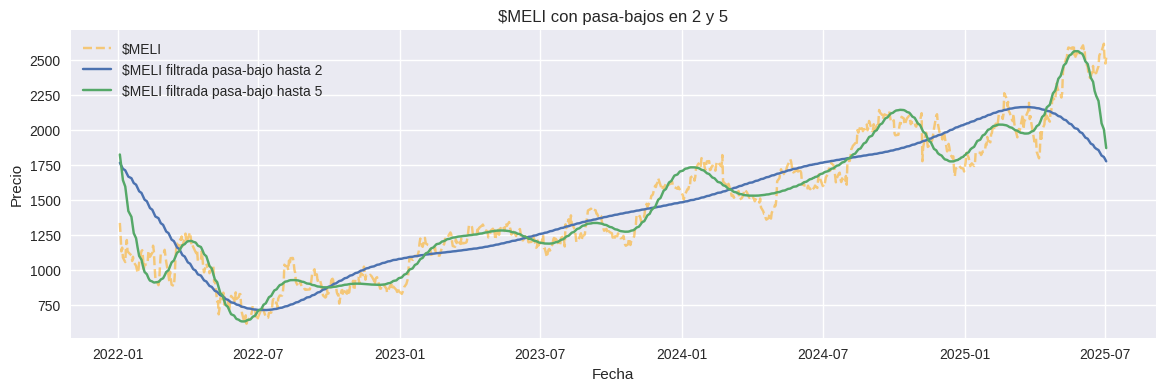

In [14]:
plot = TimeSeriesPlot(ts, (14,4))
plot.add_original(color='orange', alpha=0.5, linestyle='--')
plot.add_low_pass_filtered(2)
plot.add_low_pass_filtered(5)
plot.set_title('$MELI con pasa-bajos en 2 y 5')
plot.show()

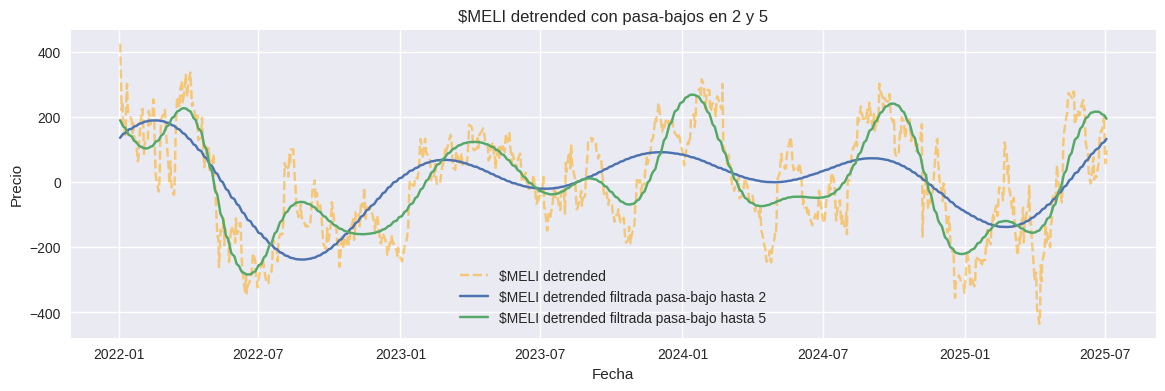

In [15]:
plot = TimeSeriesPlot(ts_detrended, (14,4))
plot.add_original(color='orange', alpha=0.5, linestyle='--')
plot.add_low_pass_filtered(2)
plot.add_low_pass_filtered(5)
plot.set_title('$MELI detrended con pasa-bajos en 2 y 5')
plot.show()

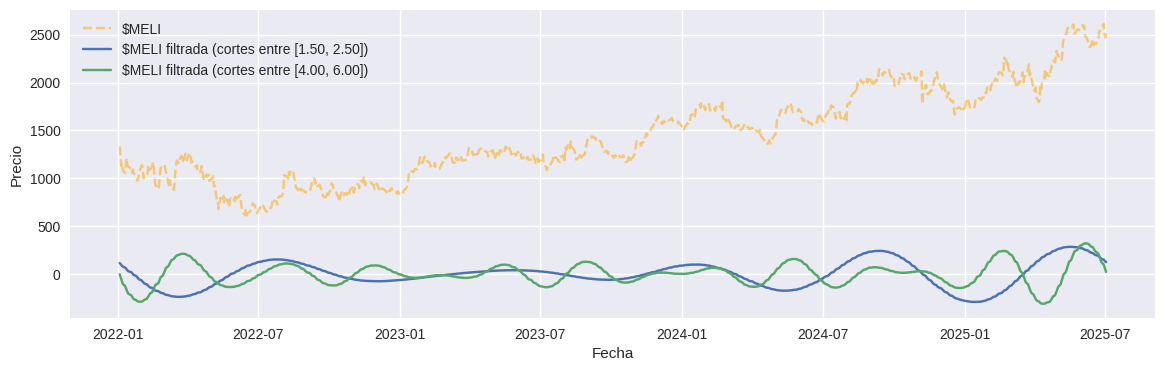

In [16]:
plot = TimeSeriesPlot(ts, (14,4))
plot.add_original(alpha=0.5, color='orange', linestyle='--')
plot.add_band_pass_filtered(1.5, 2.5)
plot.add_band_pass_filtered(4, 6)
plot.show()

Aca hablar/comparar Moving Averages con Filtros de frecuencia: aca estamos tomando frecuencias bajas, lo cual nos da resultados similares a las MA que, por ejemplo, filtran ruido intra-semanal

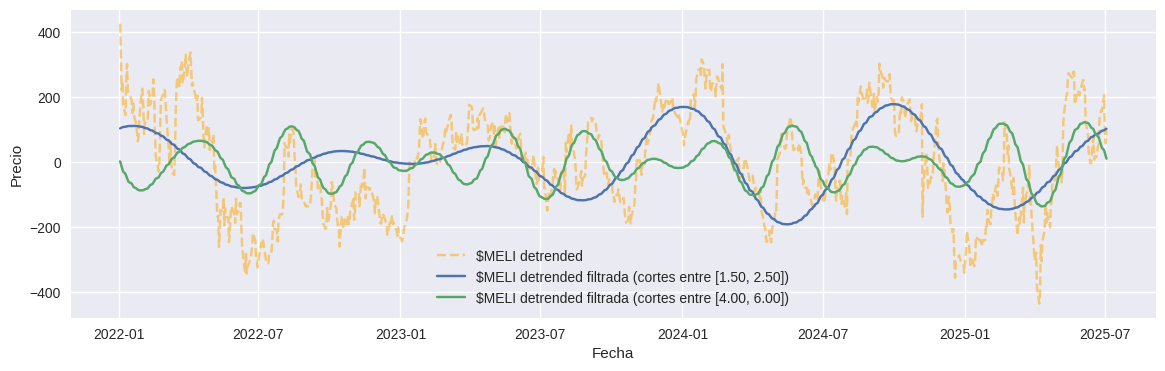

In [17]:
plot = TimeSeriesPlot(ts_detrended, (14,4))
plot.add_original(alpha=0.5, color='orange', linestyle='--')
plot.add_band_pass_filtered(1.5, 2.5)
plot.add_band_pass_filtered(4, 6)
plot.show()

## Autocorrelación

In [18]:
# # Descargar precios de MELI
# mercadolibre = 'MELI'
# nasdaq = '^IXIC'
# date = '2020-01-01'
# muestreo = '1mo' # semanal
#
# meli = yf.download(mercadolibre, start=date, interval=muestreo)
# dates = meli.index
# meli_prices = meli['Close'][mercadolibre]
# ts_meli = TimeSeries(f'{mercadolibre}', dates, meli_prices)
# ts_meli_base100 = ts_meli.normalize_base100()
#
# nasdaq_df = yf.download(nasdaq, start=date, interval=muestreo)
# dates = nasdaq_df.index
# nasdaq_prices = nasdaq_df['Close'][nasdaq]
# ts_nasdaq = TimeSeries(f'{nasdaq}', dates, nasdaq_prices)
# ts_nasdaq_base100 = ts_nasdaq.normalize_base100()

In [19]:
# plot = TimeSeriesPlot(ts_meli_base100)
# plot.add_original()
# plot.add_another(ts_nasdaq_base100)
# plot.show()

Aca hablar de cómo el índice del NASDAQ es más "suavizado", al ser mas robusto no va a fluctuar tanto como el precio de una sola empresa.

In [20]:
# plot = TimeSeriesPlot(ts_nasdaq)
# plot.add_cross_correlation_plot(ts_meli, 30)

MELI y Nasdaq están fuertemente correlacionadas (aprox 0.9).


## Forecasting

In [21]:
# Descargar cotizaciones de MELI (Mercado Libre)
meli = yf.download('MELI', start='2022-01-01', interval='1wk')
dates = meli.index
meli_prices = meli['Close']['MELI']
# Serie completa
ts_full_original = TimeSeries("$MELI original", dates, meli_prices)
ts_full_detrended = TimeSeries("$MELI original", dates, meli_prices).detrend_with_regression_fitting(
    1).detrend_with_regression_fitting(1)
trend = ts_full_original.tendency_with_regression_fitting(1)

# Serie recortada
index_until_2025 = len(dates[dates.year < 2025])
dates_until_2025 = dates[:index_until_2025]
ts_until_2025 = TimeSeries("$MELI original", dates_until_2025, ts_full_detrended.values[:index_until_2025])

[*********************100%***********************]  1 of 1 completed


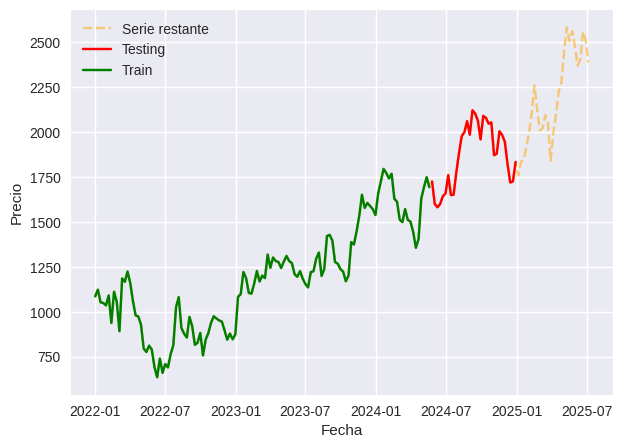

In [22]:
ts_dummy_until_2025 = TimeSeries("$MELI original", dates_until_2025, ts_full_original.values[:index_until_2025])
ts_dummy_full = TimeSeries('Serie restante', dates, ts_full_original.values)
ts_dummy_train = TimeSeries('Train', dates_until_2025[:int(len(dates_until_2025)*0.8)], ts_dummy_until_2025.values[:int(len(dates_until_2025)*0.8)])
ts_dummy_test = TimeSeries('Testing', dates_until_2025[int(len(dates_until_2025)*0.8):], ts_dummy_until_2025.values[int(len(dates_until_2025)*0.8):])
plot = TimeSeriesPlot(ts_dummy_full, figsize=(7, 5))
plot.add_original(color='orange', alpha=0.5, linestyle='--')
plot.add_another(ts_dummy_test, color='red')
plot.add_another(ts_dummy_train, color='green')
plot.show()

In [23]:
from src.LSTMsPrediction import LSTMForecaster

learning_rate = 0.002
look_back = 10
batch_size = 8
epochs = 200
test_size = 0.2

models = {}
model_configs = {
    'model_1':{
        'hidden_sizes': [50],
        'dropout': 0.0,
    },
    'model_2':{
        'hidden_sizes': [50, 25],
        'dropout': 0.2,
    },
    'model_3':{
        'hidden_sizes': [75],
        'dropout': 0.0,
    },
    'model_4':{
        'hidden_sizes': [75, 50],
        'dropout': 0.2,
    },
    'model_5':{
        'hidden_sizes': [25, 50, 25],
        'dropout': 0.2,
    },
}

# Cargo los modelos que ya entrené
for model_name, model_config in model_configs.items():
    forecaster = LSTMForecaster(ts_until_2025, look_back=look_back, test_size=test_size, batch_size=batch_size)
    forecaster.load_model(f"../lstm_model_weights/{model_name}.pth", input_size=1, output_size=1, **model_config)
    models[model_name] = forecaster

/home/neville/GitHub/time-series-analysis/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/home/neville/GitHub/time-series-analysis/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(
/home/neville/GitHub/time-series-analysis/.venv/lib/python3.12/site-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

Test MSE: 13878.3487, Test RMSE: 117.8064, Test MAE: 96.7742
Predicción MSE: 24432.0993, Predicción RMSE: 156.3077, Predicción MAE: 117.7252


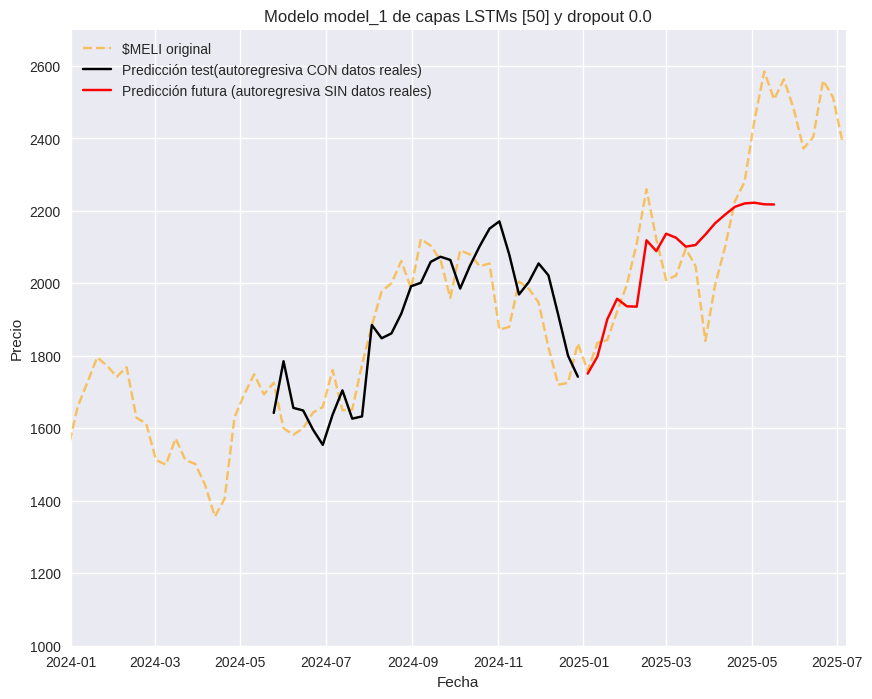

Test MSE: 11074.5574, Test RMSE: 105.2357, Test MAE: 86.4210
Predicción MSE: 57058.9798, Predicción RMSE: 238.8702, Predicción MAE: 174.2734


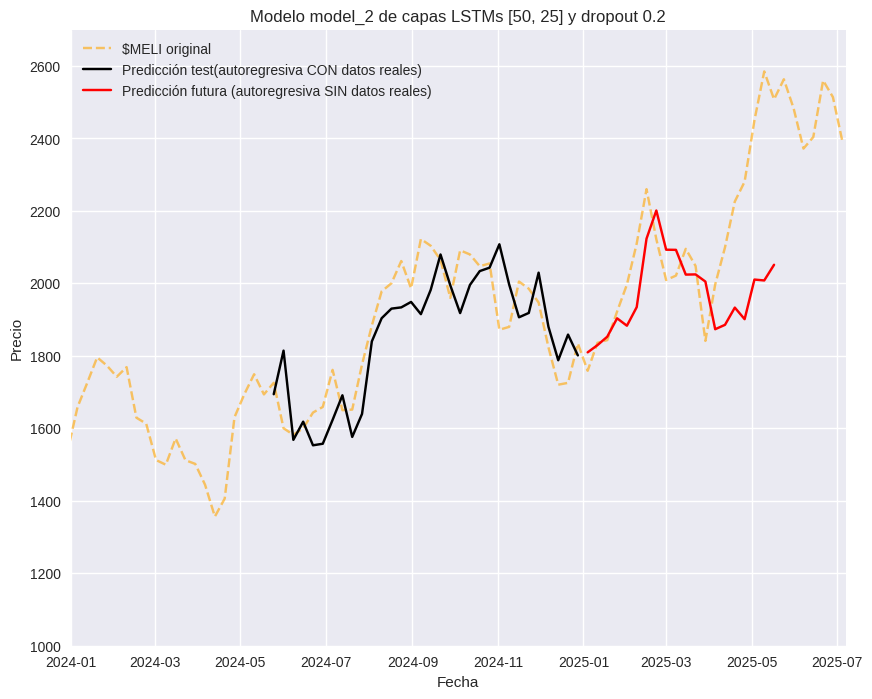

Test MSE: 13913.0966, Test RMSE: 117.9538, Test MAE: 89.9481
Predicción MSE: 62398.5799, Predicción RMSE: 249.7971, Predicción MAE: 167.1078


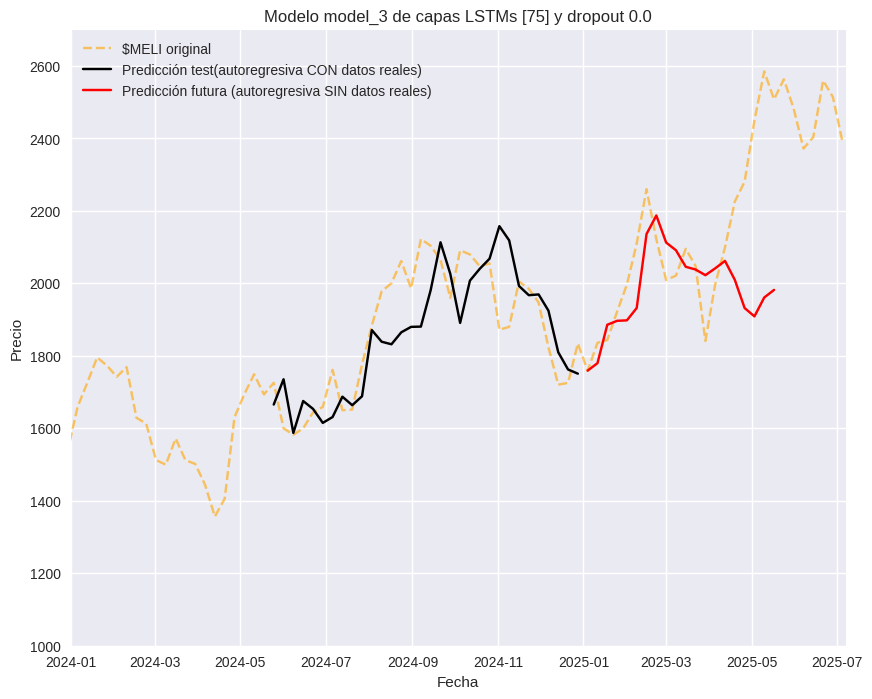

Test MSE: 15262.4464, Test RMSE: 123.5413, Test MAE: 100.8246
Predicción MSE: 61111.0788, Predicción RMSE: 247.2066, Predicción MAE: 177.8591


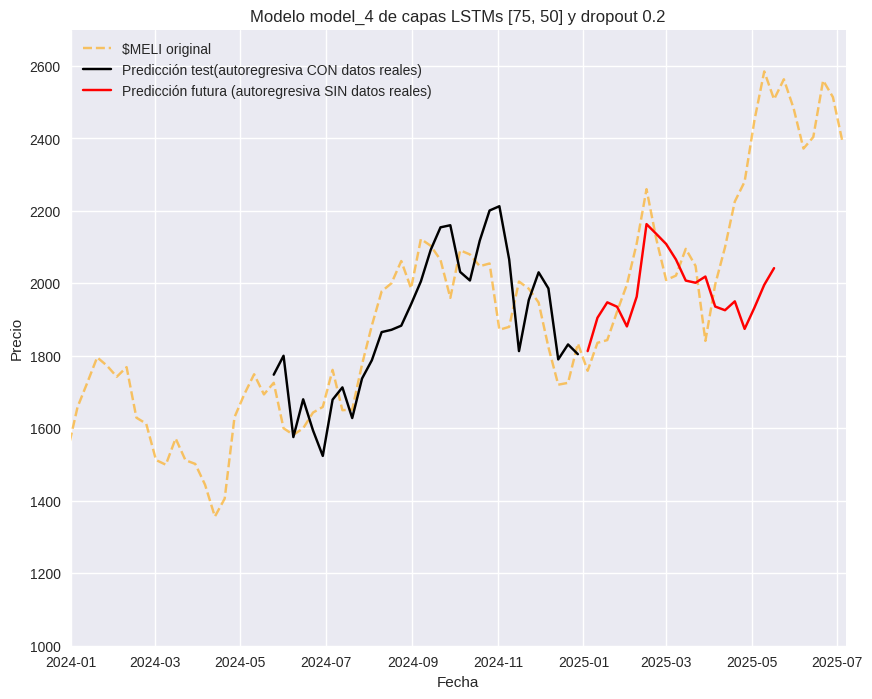

Test MSE: 14811.9781, Test RMSE: 121.7045, Test MAE: 103.7069
Predicción MSE: 25385.8611, Predicción RMSE: 159.3294, Predicción MAE: 116.0362


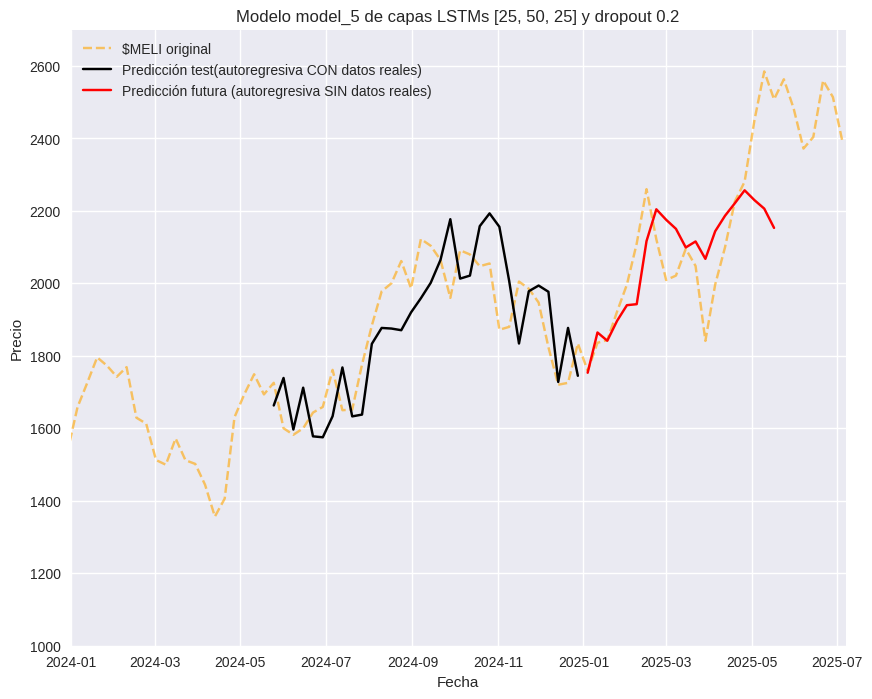

In [26]:
# Fechas para tramo de test
dates_test = dates_until_2025[int(len(dates_until_2025) * (1-test_size)):]

# Fechas para prediccion futura
n_steps = 20
dates_future_pred = dates[index_until_2025:index_until_2025+n_steps]

# Datos reales de prediccion futura
actual_future = ts_full_original.values[index_until_2025:index_until_2025+n_steps]

trend_future_pred = trend[index_until_2025:index_until_2025+n_steps]
trend_test = trend[int(len(dates_until_2025) * (1-test_size)):index_until_2025]

for model_name, model in models.items():
    # Prediccion test, ya printea MSE y MAE
    predictions, _ = model.evaluate()
    ts_test = TimeSeries(f"Predicción test(autoregresiva CON datos reales)", dates_test, predictions+trend_test)
    # Prediccion futura
    future_predictions = model.forecast_future(steps=n_steps)
    ts_future = TimeSeries(f"Predicción futura (autoregresiva SIN datos reales)", dates_future_pred, future_predictions+trend_future_pred)
    mse = mean_squared_error(actual_future, future_predictions+trend_future_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_future, future_predictions+trend_future_pred)
    print(f"Predicción MSE: {mse:.4f}, Predicción RMSE: {rmse:.4f}, Predicción MAE: {mae:.4f}")
    # Plot
    plot = TimeSeriesPlot(ts_full_original, figsize=(10,8))
    plot.set_title(f'Modelo {model_name} de capas LSTMs {model_configs[model_name]["hidden_sizes"]} y dropout {model_configs[model_name]["dropout"]}')
    plot.add_original(alpha=0.6, color='orange', linestyle='--')
    plot.add_another(ts_test, color='black')
    plot.add_another(ts_future, color="red")
    plot.set_lims(xlim=(pd.to_datetime('2024'),pd.to_datetime('2025-07-07')), ylim=(1000, 2700))
    plot.show()

## Forecasting con SARIMA